**FONDAMENTI DI COMPUTAZIONE QUANTISTICA - A.A. 2023/2024**: Home Assignment 6<br>
Caviglia Sara 5163676<br>
Fazzeri Matteo 5156526<br>

# **Algoritmo di Simon**


### **Introduzione**
L'Algortimo di Simon permette uno **speed-up esponenziale** rispetto agli analoghi classici. Supponiamo di avere un **oracolo o Black Box** che calcola una funzione, la quale prende in input una string a n bit e da come output una stringa a n bit. Per ogni x esiste un solo valore di y tale che $f(x) = f(y)$, ovvero tale che $y = x \oplus a$, dove a è la periodicità della funzione che sto cercando.
Il problema è classicamente difficile da risolvere, in quanto non esiste un algoritmo efficiente: l'unica possibilità è dare in input all'oracolo una serie di stringhe fino a che non vengono trovati i valori di $x$ e $y$ tali che $f(x) = f(y)$. Una volta trovate tali stringhe è facile calcolare il periodo come $a = x \oplus y$.
Poiché l'unico modo per risolvere il problema è provare i diversi input, bisogna sondare tutto lo spazio logico, composto da $2^n$ stringhe. Possiamo dimostrare che in media sono necessari $2^{n/2}$ tentativi e chiamate all'oracolo. La complessità, dunque, cresce esponenzialmente con il numero di bit $n$.

### **Descrizione dell'algoritmo quantistico**
Possiamo definire il nostro algoritmo come una sequenza di passi.
1. Partiamo da $n$ bit logici e $n$ qubit addizionali.<br>
$|\psi _0\rang = |0\rang ^{\oplus n} |0\rang ^{\oplus n}$
1. Applichiamo $N = 2^n$ porte di Hadamard ai primi $n$ qubit.<br>
$|\psi _1\rang = \frac{1}{\sqrt{N}}	\displaystyle\sum_{x=0}^{N-1} |x\rang |0\rang ^{\oplus n}$
1. Applichiamo l'oracolo che per ogni $|x\rang $ calcola $f(x)$ e immagazzina il suo valore negli $n$ bit finali.<br>
$|\psi _1\rang \xrightarrow{O} |\psi _2\rang = \frac{1}{\sqrt{N}}	\displaystyle\sum_{x=0}^{N-1} |x\rang |f(x)\rang $<br>
Lo stato $|f(x)\rang$ sarà associato sia allo stato $|x\rang $ sia allo stato $|x \oplus a\rang $, quindi possiamo riscrivere la formula come<br>
$|\psi _2\rang = \frac{1}{\sqrt{N/2}}	\displaystyle\sum_{x=0}^{N-1} \frac{|x\rang + |x \oplus a\rang}{\sqrt{2}} |f(x)\rang $.<br>
1. Misurando gli ultimi $n$ qubit, otterremo una stringa casuale $f(x_0)$ con probabilità $1/2^{n-1} = 2/N$. Ci interessa che i primi $n$ qubit, dopo la misura, si troveranno nello stato sovrapposizione<br>
$|\psi _3\rang = \frac{|x\rang + |x \oplus a\rang}{\sqrt{2}}$.<br>
1. Se applichiamo $n$ porte di Hadamard, otteniamo<br>
$|\psi _3\rang \xrightarrow{H^{\oplus n}} |\psi _4\rang = \frac{1}{\sqrt{2N}}\displaystyle\sum_{y=0}^{N-1} \lbrack (-1)^{x_0 \cdot y} + (-1)^{(x_0 \oplus a) \cdot y}\rbrack |y\rang = \frac{1}{\sqrt{2N}}\displaystyle\sum_{y=0}^{N-1} \lbrack (-1)^{x_0 \cdot y} + (-1)^{x_0 \cdot y + a \cdot y}\rbrack |y\rang = \frac{1}{\sqrt{2N}}\displaystyle\sum_{y=0}^{N-1} (-1)^{x_0 \cdot y} \lbrack 1+(-1)^{a\cdot y} \rbrack |y\rang $. <br>
Per le stringhe $y$ per cui $a\cdot y =1$, il coefficiente dello stato $|y\rang$ è $[1-1]=0$. Al contrario, se $a\cdot y =0$, il coefficiente dello stato $|y\rang$ è $[1+1]=1$. Nella somma precedente, quindi, sono presenti solo gli stati $|y\rang$ tali che $a \cdot y=0$, quindi la possiamo riscrivere come<br>
$|\psi _4\rang =\frac{1}{\sqrt{2N}}\displaystyle\sum_{a\cdot y=0} (-1)^{x_0 \cdot y} \lbrack 1+(-1)^{a\cdot y} \rbrack |y\rang $. <br>
1. La misura dei rimanenti $n$ qubit darà una stringa $y$ tale che $a \cdot y =0$. Dobbiamo dunque iterare la procedura per ottenere diversi valori ($a\cdot y_i = 0$ per $i = 1, ..., n$). Otteniamo, quindi, un sistema di equazioni.<br>
$
\begin{equation}
\left\{
\begin{aligned}
a\cdot y_1 =0 \\
a\cdot y_2 =0 \\
. \\
. \\
. \\
a\cdot y_n =0 
\end{aligned}
\right.
\end{equation}
$
Se le equazioni sono linearmente indipendenti, esiste una sola stringa $a$ che le soddisfa tutte.

Si può dimostrare che bastano solo $O(n)$ iterazioni del protocollo per ottenere $n$ equazioni linearmente indipendenti e determinare $a$, garantendo uno speed-up esponenziale rispetto ad un algoritmo classico.

### **Implementazione in Qiskit**
Iniziamo l'implementazione dell'algoritmo con l'importazione delle librerie che ci permettono di creare il nostro ambiente virtuale in cui lavorare.

In [1]:
import dotenv
import os

# Load the .env file
dotenv.load_dotenv()

from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
 
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token=os.environ.get("IBM_API_TOKEN"),
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)
 
# Load saved credentials
service = QiskitRuntimeService()

In [2]:
# importing Qiskit
from qiskit_aer import AerSimulator, Aer
# from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

Adesso possiamo scrivere il nostro algoritmo vero e proprio. Come oracolo abbiamo utilizzato quello presente nella libreria <code>qiskit_textbook.tools</code>.

In [3]:
bitstring = '110' # input ('insert string b: ')
n = len(bitstring) # length of the string b
simon_circuito = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuito.h(range(n))
simon_circuito.barrier() # We use barriers to improve our visualization of the circuit

simon_circuito = simon_circuito.compose(simon_oracle(bitstring))
simon_circuito.barrier()
simon_circuito.h(range(n))
simon_circuito.measure(range(n), range(n))
simon_circuito.draw()


┌───┐ ░                           ░ ┌───┐┌─┐      
q_0: ┤ H ├─░───■───────────────────────░─┤ H ├┤M├──────
     ├───┤ ░   │                       ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├─░───┼────■─────────■────■───░─┤ H ├─╫─┤M├───
     ├───┤ ░   │    │         │    │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─░───┼────┼────■────┼────┼───░─┤ H ├─╫──╫─┤M├
     └───┘ ░ ┌─┴─┐  │    │    │    │   ░ └───┘ ║  ║ └╥┘
q_3: ──────░─┤ X ├──┼────┼────┼────┼───░───────╫──╫──╫─
           ░ └───┘┌─┴─┐  │  ┌─┴─┐  │   ░       ║  ║  ║ 
q_4: ──────░──────┤ X ├──┼──┤ X ├──┼───░───────╫──╫──╫─
           ░      └───┘┌─┴─┐└───┘┌─┴─┐ ░       ║  ║  ║ 
q_5: ──────░───────────┤ X ├─────┤ X ├─░───────╫──╫──╫─
           ░           └───┘     └───┘ ░       ║  ║  ║ 
c: 3/══════════════════════════════════════════╩══╩══╩═
                                               0  1  2

### **Test con il simulatore**

Effettuiamo un primo test con un simulatore e disegniamo un istogramma con le probabilità di collasso in ogni stato.

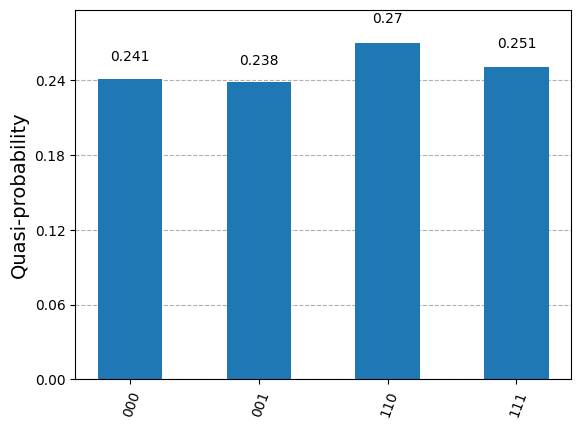

In [4]:
# Assume simon_circuit is already defined
aer_sim = AerSimulator() # Aer.get_backend('aer_simulator')
#aer_sim.set_options(precision='single')

#results = aer_sim.run(simon_circuito).result()

simon_circuito = transpile(simon_circuito, aer_sim)

results = aer_sim.run(simon_circuito).result()

# Get the counts
counts = results.get_counts()

# Normalize counts to probabilities
total_shots = sum(counts.values())
probabilities = {key: value / total_shots for key, value in counts.items()}

# Plot the histogram of probabilities
plot_histogram(probabilities)


Possiamo verificare i nostri risultati.

In [5]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(bitstring, z, bdotz(bitstring,z)) )

110.111 = 0 (mod 2)
110.110 = 0 (mod 2)
110.000 = 0 (mod 2)
110.001 = 0 (mod 2)


La verifica finale sarebbe la risoluzione del sistema lineare ottenuto.